# Example OpenMalaria Environment (beta)

In [1]:
%load_ext autoreload
%autoreload 2    

import sys
import numpy as np
import libs.register
import libs.location
import libs.environment

In [2]:
#User Details (Please enter your own :)
email = ""
institution = ""
names = ""
baseuri = "http://openmalaria-v1.mybluemix.net:80"
#Currently provided public IP, we will enable users to install on their own environment with Docker shortly!

In [3]:
#Registration
userId = libs.register.Register(email, institution, names, baseuri)
print('userId=', userId)

('userId=', u'a576de095520409283a022d7369f6774')


Now you are registered as a user and currently we have a single location available to test: 'workshop_scenario_action'

In [4]:
locations = libs.location.showLocations(baseuri)
locationId = libs.location.getLocationId(locations, 'workshop_scenario_action')

workshop_scenario_base
workshop_scenario_action
('locationId = ', u'70f702d6c86a49f9a32af0aada598a82')


Start taking actions: Initialise Environment Rachuonyo South and Run a simulation describing current deployment of Intervention 55% ITN and 70% IRS

In [5]:
envId = libs.environment.initEnv(locationId, userId, baseuri)
print('envId=', envId)
action = [0.55, 0.70] #[ITN, IRS]
reward = libs.environment.postAction(envId, action, baseuri)
rewards = np.append(action, reward)
print reward

AttributeError: 'module' object has no attribute 'environment'

Now let's initalise a few random experiments and observe the rewards

In [19]:
# rewards = np.append(action, reward)
rand_actions = np.random.rand(60,2) #3 random actions [ITN, IRS]

for action in rand_actions:
    print(action)
    envId = libs.environment.initEnv(locationId, userId, baseuri)
    reward = libs.environment.postAction(envId, action, baseuri)
    result = np.append(action, reward)
    rewards = np.vstack((rewards, result))

[ 0.70523234  0.14008677]
('waiting', u'f3d60c994ed848d2ae2c95c0902c4b51')
('Cost Per Daly Averted:', u'-20.28784899695146')
[ 0.87573566  0.03039645]
('waiting', u'33de9d2bc23d4f3c8ce20b25821bffd9')
('Cost Per Daly Averted:', u'-12.795216555841172')
[ 0.39170697  0.89716959]
('waiting', u'092b8abb8f1c4d42aea1e3215bd5f7e8')
('Cost Per Daly Averted:', u'-6.330174174772679')
[ 0.26357269  0.03996977]
('waiting', u'9193014163c1493e80d6221a81cbacac')
('Cost Per Daly Averted:', u'-108.08618859058826')
[ 0.54004095  0.94521302]
('waiting', u'365c27ff88cf468f8c8ec8c353b0499c')
('Cost Per Daly Averted:', u'-19.71709184638383')
[ 0.91185583  0.54565148]
('waiting', u'56cbb5125d91455c997d04bd8f11ee5c')
('Cost Per Daly Averted:', u'-14.261282949886512')
[ 0.37238921  0.90969734]
('waiting', u'39e73941d83b49f3b851ec754f7f2528')
('Cost Per Daly Averted:', u'3.453943494727975')
[ 0.41267966  0.78321697]
('waiting', u'77cc9aa75c634eff98d465cbb88d46c0')
('Cost Per Daly Averted:', u'-12.622026585990067

Visualise rewards, in this case as a simple scatter of points as a response surface (MatPlotLib may be required but you are free to visualise the data how you see fit)

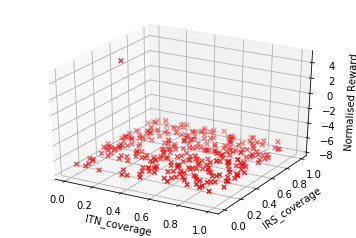

In [17]:
libs.visualisation.ResponseSurface(rewards)

## Now time to try and break it! 

You're now free to explore! Given the code snippets of how to post actions, in order to come up with new algorithms for novel high performing malaria interventions for this location...